In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import warnings

# To ignore FutureWarning
warnings.filterwarnings("ignore", category=FutureWarning)

## Part 1

In [2]:
# Importing bank_marketing.csv as a dataframe using Pandas
bank = pd.read_csv('bank_marketing.csv', header=0, sep=';')
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,58.0,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44.0,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33.0,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47.0,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33.0,unknown,single,unknown,no,1,no,no,NaN,5,may,198,1,-1,0,unknown,no


In [3]:
#number of rows and columns in the bank dataset
bank.shape

(45211, 17)

There are 17 columns and 45,211 rows in the dataframe.

In [4]:
#type of data in each column 
bank.dtypes

age          float64
job           object
marital       object
education     object
default       object
balance        int64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
deposit       object
dtype: object

In [5]:
#checking for any redundant data in dataframe 
duplicated_rows = bank.duplicated().sum()
duplicated_rows

0

In [6]:
#describe characteristics 
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,43872.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.924781,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.610835,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


## Check for Outliers

The descriptive table above shows that the columns balance, duration, campaign, pdays, and previous have outliers based on the maximum value being significantly higher than the mean.

In [7]:
#create function that finds the number of outliers in a column of a dataframe
def find_outliers(df, column):
    #Calculate the interquartile range (IQR)
    q1 = df[column].quantile(0.25) #find Q1
    q3 = df[column].quantile(0.75) #find #Q3
    iqr = q3 - q1 
    
    #calculate the lower and upper bound for outliers
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    #find the outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    
    return outliers #retirn the outliers


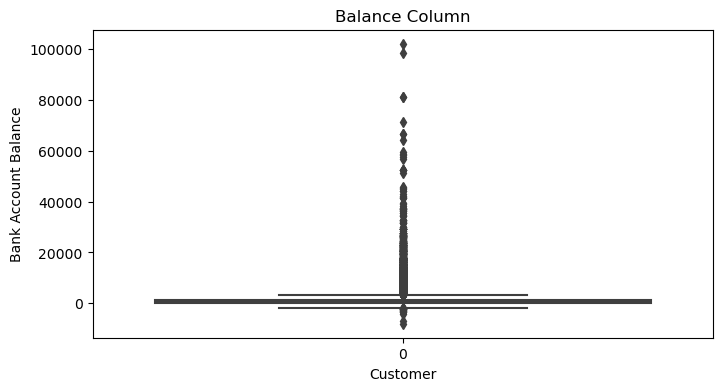

In [8]:
#plot boxplot of balance column
fig = plt.figure(figsize = (8,4))
sns.boxplot(data=bank['balance'])
plt.xlabel('Customer')
plt.ylabel('Bank Account Balance')
plt.title('Balance Column')

plt.show()


In [9]:
#number outliers in balance column 
len(find_outliers(bank, 'balance'))

4729

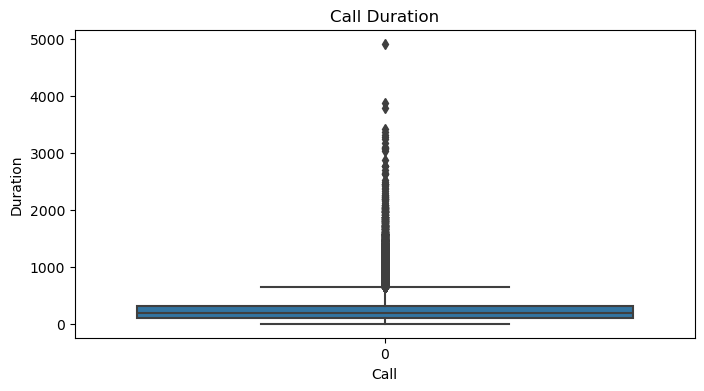

In [10]:
#plot boxplot of duration column 
fig = plt.figure(figsize = (8,4))
sns.boxplot(data=bank['duration'])
#labels
plt.xlabel('Call')
plt.ylabel('Duration')
plt.title('Call Duration')
plt.show()

In [11]:
#number outliers in the duration column 
len(find_outliers(bank, 'duration'))

3235

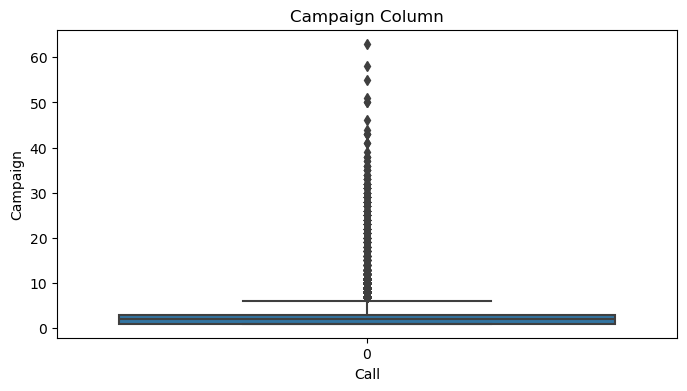

In [12]:
#plot boxplot of campaign column
fig = plt.figure(figsize = (8,4))
sns.boxplot(data=bank['campaign'])
#labels
plt.xlabel('Call')
plt.ylabel('Campaign')
plt.title('Campaign Column')
plt.show()

In [13]:
#number outliers in the campaign column 
len(find_outliers(bank, 'campaign'))

3064

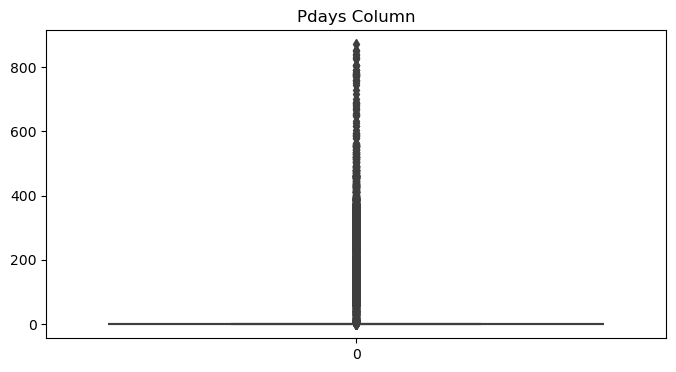

In [14]:
#boxplot of pdays column 
fig = plt.figure(figsize = (8,4))
sns.boxplot(data=bank['pdays'])
plt.title('Pdays Column')
plt.show()

In [15]:
#number outliers in the pdays column 
len(find_outliers(bank, 'pdays'))

8257

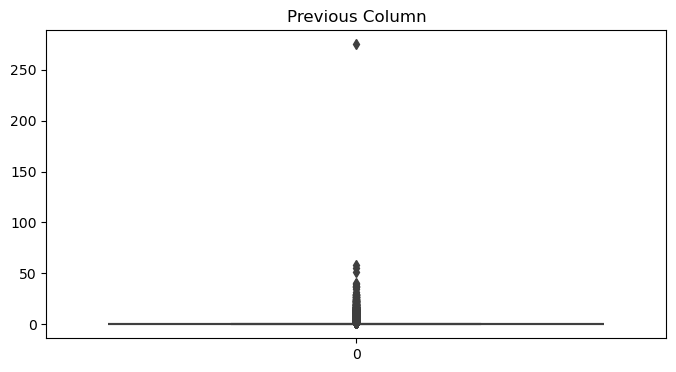

In [16]:
#boxplot of previous column 
fig = plt.figure(figsize = (8,4))
sns.boxplot(data=bank['previous'])
plt.title('Previous Column')
plt.show()

In [17]:
#number outliers in previous column 
len(find_outliers(bank, 'previous'))

8257

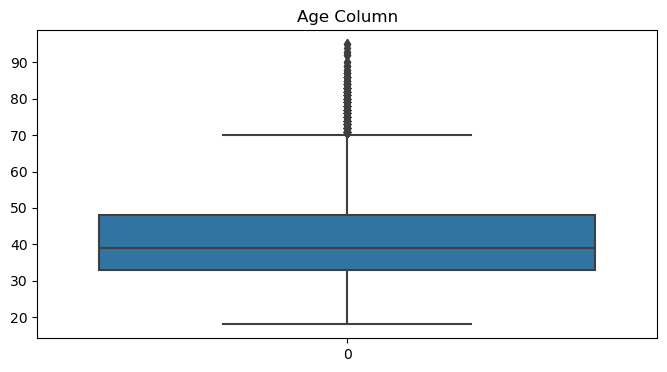

In [18]:
#boxplot of age column
fig = plt.figure(figsize = (8,4))
sns.boxplot(data=bank['age'])
plt.title('Age Column')
plt.show()

In [19]:
#number outliers in the age column 
len(find_outliers(bank, 'age'))

468

In [20]:
#checking columns to see all the different values used in object type data

#job unique column values
print('Job:', bank['job'].unique())
#marital unique column values
print('Marital:', bank['marital'].unique())
#education unique column values
print('Education:', bank['education'].unique())
#default unique column values 
print('Default:', bank['default'].unique())
#housing unique column values 
print('Housing:', bank['housing'].unique())
#loan unique column values 
print('loan:', bank['loan'].unique())
#contact unique column values 
print('contact:', bank['contact'].unique())
#month unique column values 
print('Month:', bank['month'].unique())
#poutcome unique column values 
print('poutcome:', bank['poutcome'].unique())
#deposit unique column values 
print('Deposit:', bank['deposit'].unique())

Job: ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
Marital: ['married' 'single' 'divorced']
Education: ['tertiary' 'secondary' 'unknown' 'primary']
Default: ['no' 'yes' nan]
Housing: ['yes' 'no']
loan: ['no' 'yes']
contact: ['unknown' nan 'cellular' 'telephone']
Month: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
poutcome: ['unknown' 'failure' 'other' 'success']
Deposit: ['no' 'yes']


The values in the object columns has normal values. There is no sign of any outliers or mistakes in the rows, besides the missing values.

## Handling Missing Data

In [21]:
#each columns total missing data 
bank.isna().sum()
#the output shows there is missing values in the columns age, default, and contact

age          1339
job             0
marital         0
education       0
default      1306
balance         0
housing         0
loan            0
contact      1383
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome        0
deposit         0
dtype: int64

Missing data is found in three columns. Age has 1,339 missing values, the default column has 1,306 missing values, and the contact column has 1,383 missing values.

#### Age Column

In [22]:
#find the mean for the age column and fill missing data with the mean
bank['age'].fillna(bank['age'].mean(), inplace=True)

#### Default Column

In [23]:
#show all unique values in the default column 
unique_default = bank['default'].unique()
print('Unique Values:', unique_default)
#find the mode 
mode= bank['default'].mode()[0]
print('Default Mode:', mode)

Unique Values: ['no' 'yes' nan]
Default Mode: no


In [24]:
#fill missing values in default column with the mode
bank['default'].fillna(mode, inplace=True)

#### Contact Column

In [25]:
#see all the value options in the contact column
bank['contact'].unique()

#fill missing values with 'unknown' contact option 
bank['contact'].fillna('unknown', inplace=True)

In [26]:
#check to see missing values were resolved
bank.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

# Part 2
Based on the data, going to take a closer look at "age"

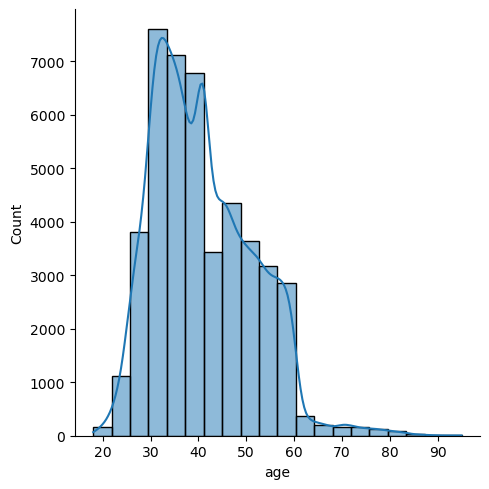

In [27]:
#Create a histogram for age
sns.displot(bank, x="age", bins=20, kde=True)

Seems like most people that were reached out to are between 30 and 50

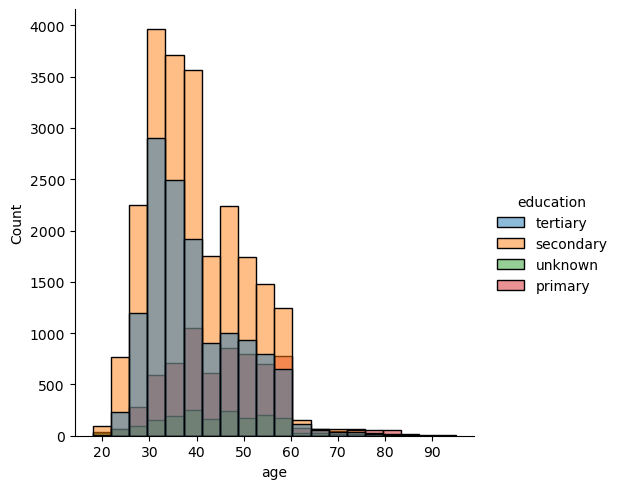

In [28]:
#Create a histogram for age, added the education level
sns.displot(bank, x="age", bins=20, hue="education")

Most people finished their secondary degree

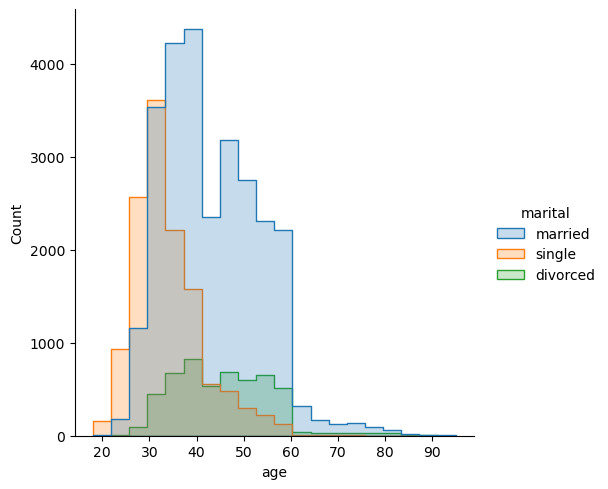

In [29]:
#Taking a closer look at the marital status
sns.displot(bank, x="age", bins=20, hue="marital",element="step")

<Axes: xlabel='age', ylabel='balance'>

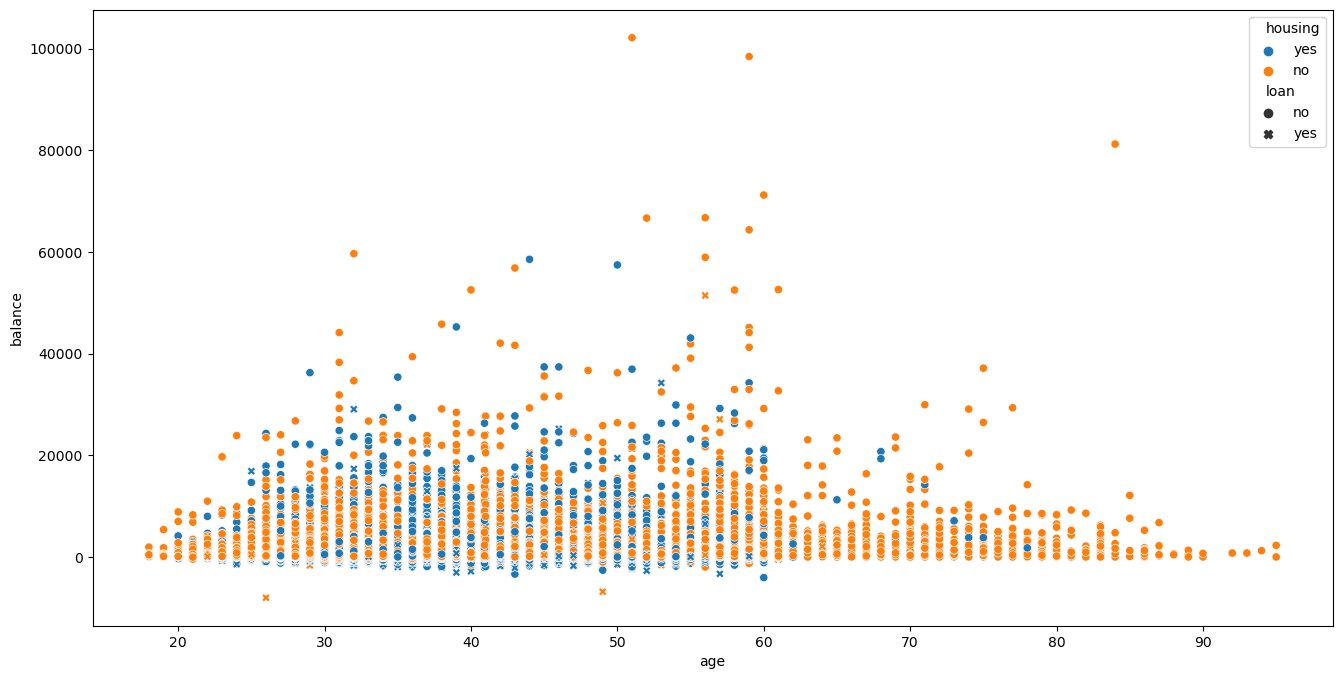

In [30]:
#Lets compare balance and age in a scatterplot
#Looking at the housing and personal loan at the same time
plt.figure(figsize=(16,8))
sns.scatterplot(data=bank, x="age", y="balance", hue="housing", style="loan")

Based on the scatter, it seems like people who has higher bank balance mostly do not have housing nor personal loan, and they tend to be older

In [31]:
corr = bank.corr()

ValueError: could not convert string to float: 'management'

In [ ]:
# Looking at the correlation through heatmap

plt.figure(figsize=(8,4), dpi =100)
sns.heatmap(corr,annot=True,fmt=".2f", linewidth=.5)
plt.show()

Seems like that is very little to no correlation between the numeric fields except maybe pdays and previous

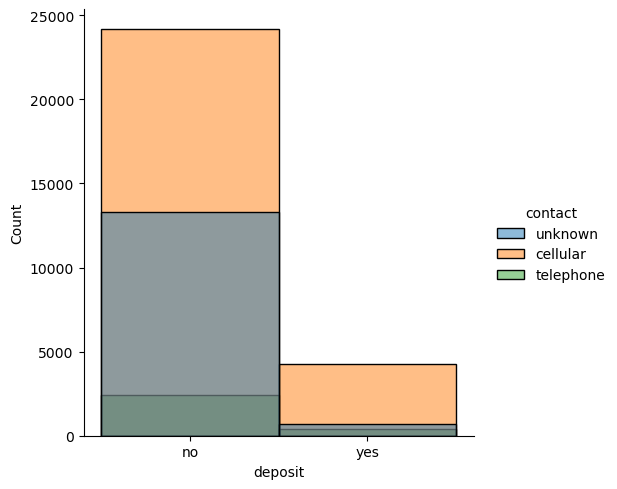

In [34]:
sns.displot(bank, x="deposit",hue="contact")

In [35]:
bank["deposit"].value_counts()

deposit
no     39922
yes     5289
Name: count, dtype: int64

Based on the "deposit" column result, seems like the campaign only has 11.7% success rate.

In [36]:
#We will be looking at out of the deposit outcome, what methods of contact were used
bank[["deposit","contact"]].groupby(["deposit","contact"]).size()

deposit  contact  
no       cellular     24165
         telephone     2435
         unknown      13322
yes      cellular      4245
         telephone      374
         unknown        670
dtype: int64

In [37]:
print("Cellular Success Rate is ",round(4245/(24165+4245),2),"%")
print("Telephone Success Rate is ",round(374/(2435+374),2),"%")
print("Unknown Success Rate is ",round(670/(13322+670),2),"%")

Cellular Success Rate is  0.15 %
Telephone Success Rate is  0.13 %
Unknown Success Rate is  0.05 %


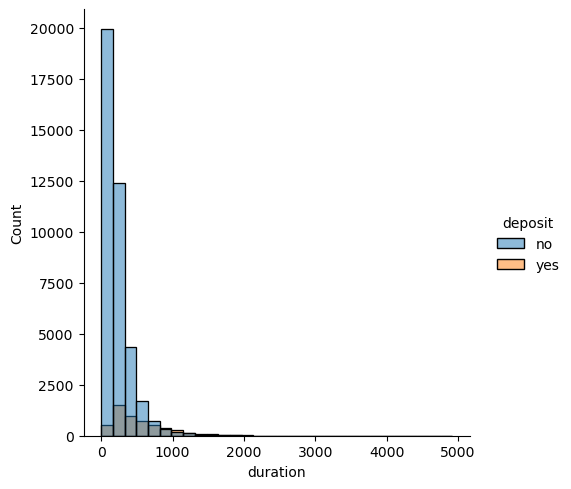

In [38]:
sns.displot(bank, x="duration", bins=30, hue="deposit")

Based on the data above, it seems like the duration histogram is heavily right skewed. We can try applying a log distribution here.

In [39]:
#There are 3 rows with duration 0 which will cause an error in log function
bank[(bank["duration"]==0)]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
6424,53.000000,management,married,primary,no,351,yes,no,unknown,27,may,0,4,-1,0,unknown,no
22937,40.924781,technician,married,secondary,no,5535,no,no,cellular,26,aug,0,15,-1,0,unknown,no
36425,31.000000,entrepreneur,married,secondary,no,162,yes,yes,cellular,11,may,0,2,-1,0,unknown,no


In [40]:
bank["duration"].replace(0,1,inplace=True)

In [41]:
bank[(bank["duration"]<=1)]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
6424,53.000000,management,married,primary,no,351,yes,no,unknown,27,may,1,4,-1,0,unknown,no
22937,40.924781,technician,married,secondary,no,5535,no,no,cellular,26,aug,1,15,-1,0,unknown,no
31740,39.000000,technician,divorced,secondary,no,17441,yes,yes,cellular,7,apr,1,1,-1,0,unknown,no
36425,31.000000,entrepreneur,married,secondary,no,162,yes,yes,cellular,11,may,1,2,-1,0,unknown,no
44758,28.000000,admin.,married,secondary,no,1595,no,no,unknown,9,sep,1,1,254,4,success,no


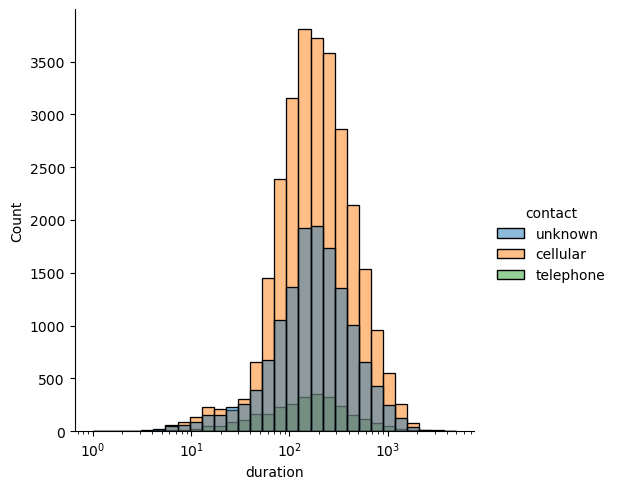

In [42]:
sns.displot(bank, x="duration", bins=30, hue="contact",log_scale=True)

In the log scaled histogram, we can see this having a "normal" distribution

# Part 3

In [43]:
# Select only categorical columns
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
bank_categorical = bank[categorical_cols]

# One-hot encode categorical columns
bank_encoded = pd.get_dummies(bank_categorical, drop_first=True)

In [44]:
# Combine one-hot encoded columns with the original DataFrame
bank = pd.concat([bank, bank_encoded], axis=1)

# Drop the original categorical columns
bank.drop(categorical_cols, axis=1, inplace=True)

# Define features (X) and target variable (y)
X = bank.drop('deposit', axis=1)
y = bank['deposit']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Choose a model (Logistic Regression)
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

/Applications/miniconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.8883114010837112
Confusion Matrix:
[[7790  162]
 [ 848  243]]
Classification Report:
              precision    recall  f1-score   support

          no       0.90      0.98      0.94      7952
         yes       0.60      0.22      0.32      1091

    accuracy                           0.89      9043
   macro avg       0.75      0.60      0.63      9043
weighted avg       0.87      0.89      0.87      9043



The accuracy represents the overall correctness of the model's predictions. In this case, approximately 88.54% of predictions are correct. 

[[7784  168]
 [ 868  223]]
True Positive (TP): 223 (correctly predicted 'yes')
True Negative (TN): 7784 (correctly predicted 'no')
False Positive (FP): 168 (incorrectly predicted 'yes' when it was 'no')
False Negative (FN): 868 (incorrectly predicted 'no' when it was 'yes')

             precision    recall  f1-score   support

       no       0.90      0.98      0.94      7952
      yes       0.57      0.20      0.30      1091
Precision: Of the instances predicted as 'yes', 57% were correct.
Recall: Of the actual 'yes' instances, 20% were correctly predicted.
F1-score: The harmonic mean of precision and recall, providing a balance between the two metrics.

The model performs well in predicting instances labeled as 'no,' with high precision and recall.
However, the performance on predicting instances labeled as 'yes' is not as strong, with lower precision and recall.
The weighted average F1-score is 0.86, indicating an overall reasonable balance between precision and recall.

Depending on the specific goals and context of your application, you might want to adjust the model or explore other algorithms to improve performance on the minority class ('yes').

Overall, the accuracy is relatively high, but it's essential to consider the context and specific requirements of your application to determine the most appropriate model evaluation metrics.

#### Random Forests

In [45]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Fit the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf}")
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.9042353201371226
              precision    recall  f1-score   support

          no       0.92      0.97      0.95      7952
         yes       0.67      0.40      0.50      1091

    accuracy                           0.90      9043
   macro avg       0.80      0.69      0.72      9043
weighted avg       0.89      0.90      0.89      9043

